<h1>Using RANDOM FOREST CLASSIFIER This projet solve the july 2021 Data <br> <br> Science Nigeria (DSN) Hackaton Hosted on Kaggle</h1> <hr>

<div>A Data analysis and machine learnig project Carried out to determined if a customer will subscribed for plan using the RANDOM FOREST CLASSIFIER</div> <br>
<div> with the help of microsoft excel for storing the data in csv and PostgreSQL for further query</div>


## Loading relevant Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

## Loading data

In [2]:
data = pd.read_csv('train.csv')

## Understanding data

<p>Understandarding the data is very pivotal in performing <strong> Explorative data analysis</strong> </p>

In [3]:
data.head(5)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [4]:
data.shape

(28831, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
customer_id       28831 non-null object
age               28831 non-null int64
job               28831 non-null object
marital           28831 non-null object
education         28831 non-null object
default           28831 non-null object
housing           28831 non-null object
loan              28831 non-null object
contact           28831 non-null object
month             28831 non-null object
day_of_week       28831 non-null object
duration          28831 non-null float64
campaign          28831 non-null int64
pdays             28831 non-null int64
previous          28831 non-null int64
poutcome          28831 non-null object
emp_var_rate      28831 non-null float64
cons_price_idx    28831 non-null float64
cons_conf_idx     28831 non-null float64
euribor3m         28831 non-null float64
nr_employed       28831 non-null float64
subscribed        28831 non-null int64
dtypes: fl

In [6]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [7]:
cat = data.dtypes[data.dtypes == 'object'].index
data[cat].describe()

,customer_id,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,28831,28831,28831,28831,28831,28831,28831,28831,28831,28831,28831
unique,28831,12,4,8,3,3,3,2,10,5,3
top,customer_id_22007,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,1,7338,17368,8530,22849,15096,23733,18339,9534,6020,24907


In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


In [9]:
data.head(2)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


## We have no missing data or wrong data entery, we therefore proceed to the next phase

<strong> All columns looks important with the exception of the customer id. we now proceed to explorative data anaylsis</strong>
<br>
<hr>

<h2> Explorative data anaylsis <h2>


### Univariate analysis

In [10]:
age = data['age']

In [11]:
data['age'].describe()

count    28831.000000
mean        42.011203
std         10.450128
min         19.000000
25%         34.000000
50%         40.000000
75%         49.000000
max        100.000000
Name: age, dtype: float64

In [12]:
job = data['job']

In [13]:
job.value_counts()

admin.           7338
blue-collar      6500
technician       4656
services         2809
management       2014
retired          1180
self-employed    1016
entrepreneur      988
housemaid         754
unemployed        702
student           638
unknown           236
Name: job, dtype: int64

In [14]:
# Percentage count
job.value_counts(normalize = True)*100

admin.           25.451771
blue-collar      22.545177
technician       16.149284
services          9.742985
management        6.985536
retired           4.092817
self-employed     3.523985
entrepreneur      3.426867
housemaid         2.615241
unemployed        2.434879
student           2.212896
unknown           0.818563
Name: job, dtype: float64

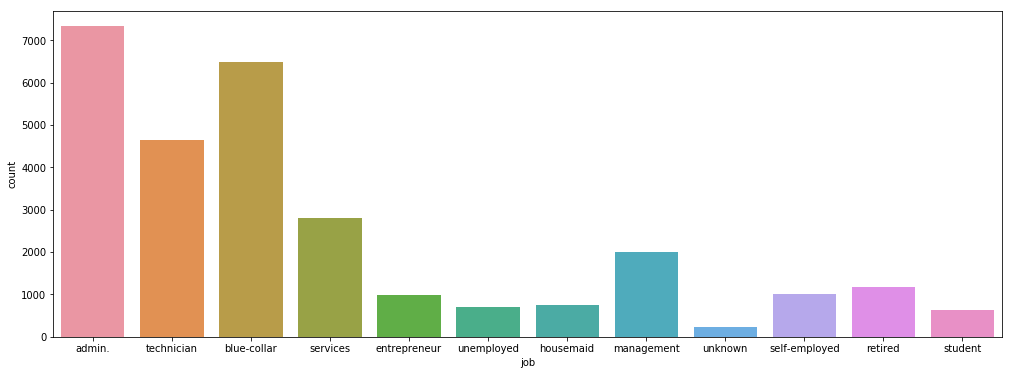

In [15]:
plt.figure(figsize =(17,6))
sns.countplot(x = 'job', data = data)

In [16]:
data['marital'].describe()

count       28831
unique          4
top       married
freq        17368
Name: marital, dtype: object

In [17]:
data['marital'].value_counts()

married     17368
single       8189
divorced     3222
unknown        52
Name: marital, dtype: int64

In [18]:
data['marital'].value_counts(normalize = True)*100

married     60.240713
single      28.403455
divorced    11.175471
unknown      0.180361
Name: marital, dtype: float64

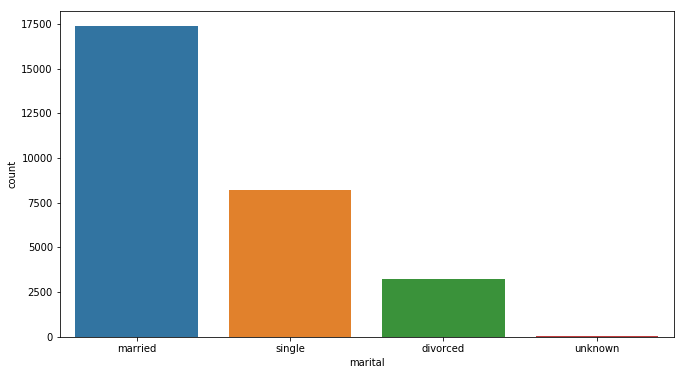

In [19]:
plt.figure(figsize =(11,6))
sns.countplot(x = 'marital', data = data)

In [20]:
data.head(2)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [21]:
data['education'].describe()

count                 28831
unique                    8
top       university.degree
freq                   8530
Name: education, dtype: object

In [22]:
data['education'].value_counts()

university.degree      8530
high.school            6718
basic.9y               4167
professional.course    3648
basic.4y               2914
basic.6y               1607
unknown                1236
illiterate               11
Name: education, dtype: int64

In [23]:
data['education'].value_counts(normalize = True)*100

university.degree      29.586209
high.school            23.301308
basic.9y               14.453193
professional.course    12.653047
basic.4y               10.107176
basic.6y                5.573861
unknown                 4.287052
illiterate              0.038153
Name: education, dtype: float64

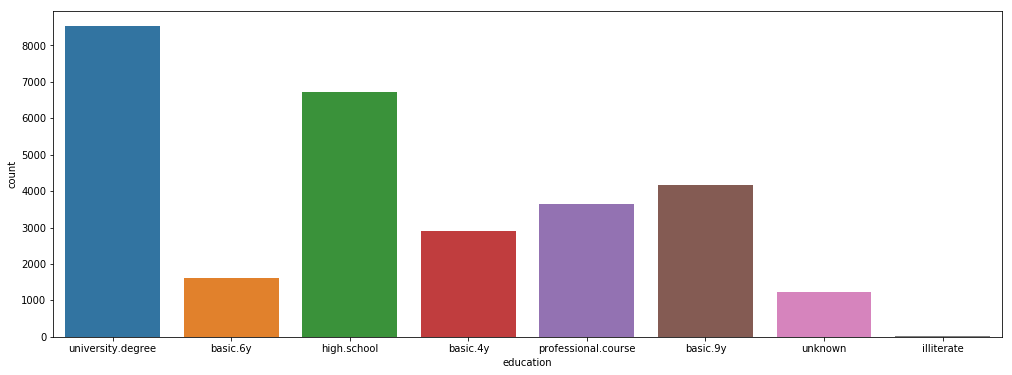

In [24]:
plt.figure(figsize =(17,6))
sns.countplot(x = 'education', data = data)

In [25]:
data['default'].describe()

count     28831
unique        3
top          no
freq      22849
Name: default, dtype: object

In [26]:
data['default'].value_counts()

no         22849
unknown     5980
yes            2
Name: default, dtype: int64

In [27]:
data['default'].value_counts(normalize = True)

no         0.792515
unknown    0.207416
yes        0.000069
Name: default, dtype: float64

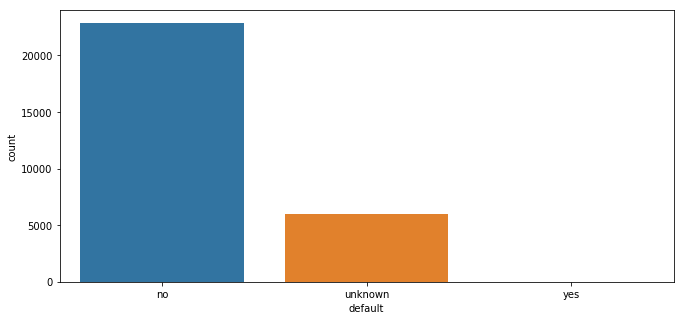

In [28]:
plt.figure(figsize =(11,5))
sns.countplot(x = 'default', data = data)

In [29]:
data['housing'].describe()

count     28831
unique        3
top         yes
freq      15096
Name: housing, dtype: object

In [30]:
data['housing'].value_counts()

yes        15096
no         13021
unknown      714
Name: housing, dtype: int64

In [31]:
data['housing'].value_counts(normalize = True)*100

yes        52.360307
no         45.163192
unknown     2.476501
Name: housing, dtype: float64

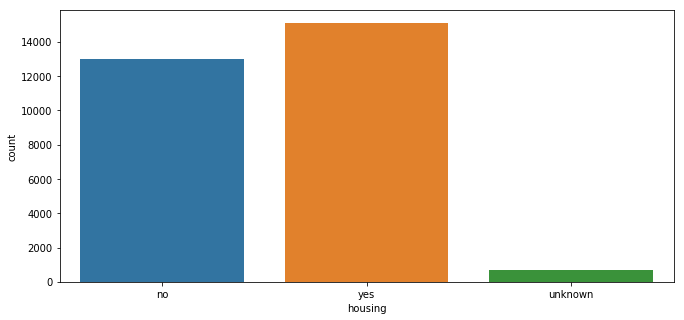

In [32]:
plt.figure(figsize =(11,5))
sns.countplot(x = 'housing', data = data)

In [33]:
data['loan'].describe()

count     28831
unique        3
top          no
freq      23733
Name: loan, dtype: object

In [34]:
data['loan'].value_counts()

no         23733
yes         4384
unknown      714
Name: loan, dtype: int64

In [35]:
data['loan'].value_counts(normalize = True)*100

no         82.317644
yes        15.205855
unknown     2.476501
Name: loan, dtype: float64

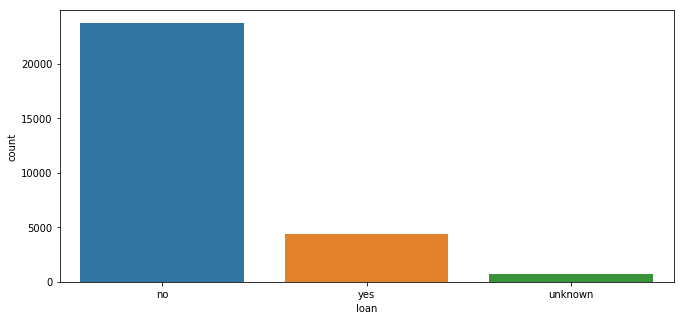

In [36]:
plt.figure(figsize =(11,5))
sns.countplot(x = 'loan', data = data)

In [37]:
data['contact'].value_counts(normalize =True)*100

cellular     63.608616
telephone    36.391384
Name: contact, dtype: float64

In [38]:
data['contact'].value_counts()

cellular     18339
telephone    10492
Name: contact, dtype: int64

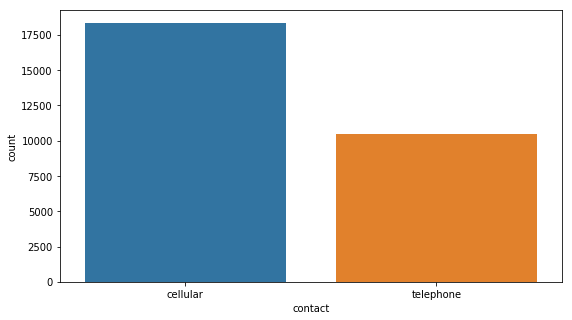

In [39]:
plt.figure(figsize =(9,5))
sns.countplot(x = 'contact', data = data)

In [40]:
data.columns
## do months
# After you are done which each columns reduce the cell by creating the dashbored and reduce the indiviual columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [41]:
data['month'].value_counts(normalize =True)*100

may    33.068572
jul    17.581770
aug    15.018556
jun    12.986022
nov     9.971905
apr     6.329992
oct     1.824425
mar     1.383927
sep     1.366585
dec     0.468246
Name: month, dtype: float64

In [42]:
data['month'].value_counts()

may    9534
jul    5069
aug    4330
jun    3744
nov    2875
apr    1825
oct     526
mar     399
sep     394
dec     135
Name: month, dtype: int64

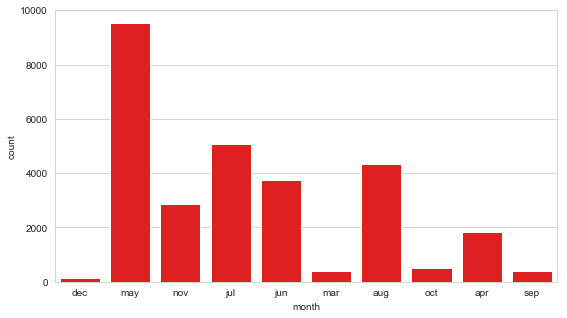

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize =(9,5))
sns.countplot(x = 'month', data = data, color = 'r')

In [44]:
data['day_of_week'].value_counts(normalize =True)*100

thu    20.880302
mon    20.505706
wed    19.877909
tue    19.610836
fri    19.125247
Name: day_of_week, dtype: float64

In [45]:
data['day_of_week'].value_counts()

thu    6020
mon    5912
wed    5731
tue    5654
fri    5514
Name: day_of_week, dtype: int64

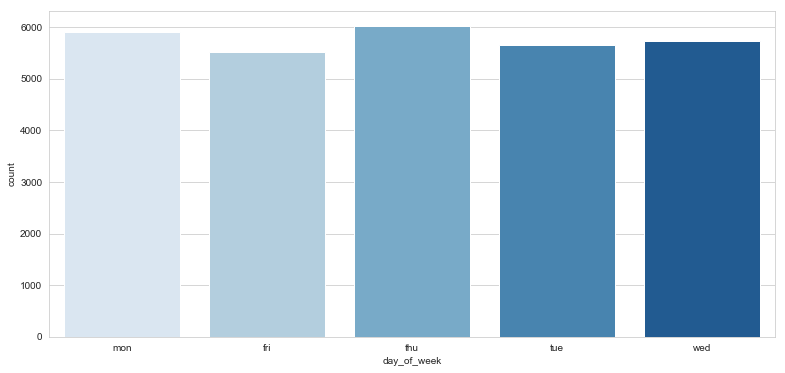

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize =(13,6))
sns.countplot(x = 'day_of_week', data = data, palette = 'Blues')

In [47]:
data['duration'].head()

0     1.283333
1     0.200000
2     4.616667
3     1.166667
4    19.683333
Name: duration, dtype: float64

In [48]:
data['duration'].describe()

count    28831.000000
mean         4.297919
std          4.336882
min          0.000000
25%          1.700000
50%          3.000000
75%          5.300000
max         81.966667
Name: duration, dtype: float64

C:\Users\Emack\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


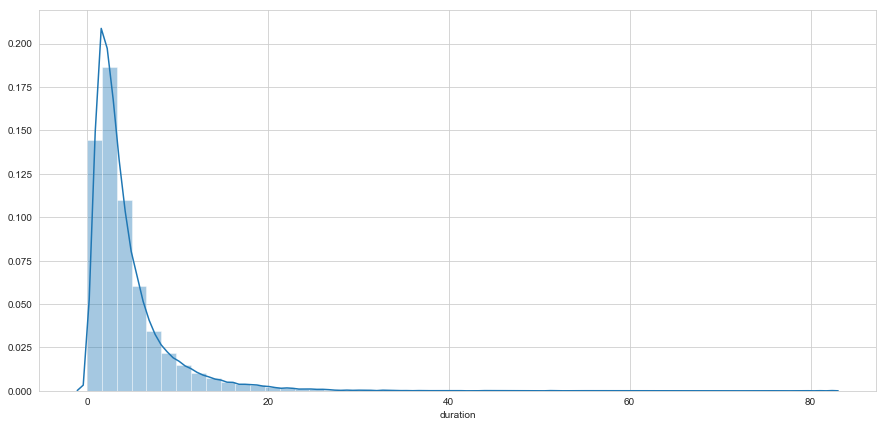

In [49]:
plt.figure(figsize =(15,7))
sns.distplot(data['duration'])

 They appear to be outliers in the duration columns 

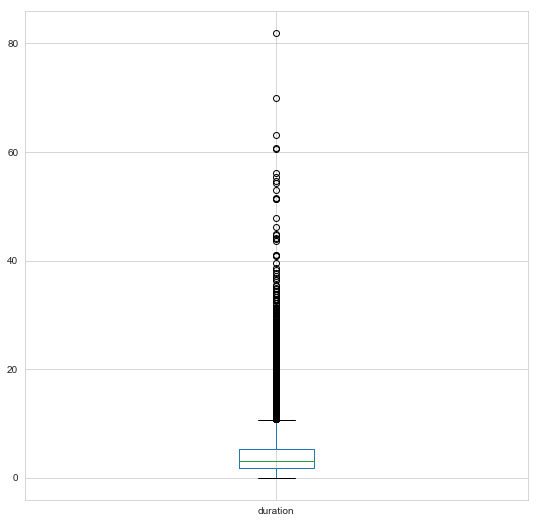

In [50]:
data['duration'].plot(kind = 'box', figsize = (9,9))

The outlier are minor and after due analysis should be left alone

In [51]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [52]:
data['campaign'].value_counts()

1     12264
2      7389
3      3804
4      1892
5      1083
6       694
7       434
8       283
9       218
10      155
11      126
12       95
13       66
14       47
17       43
16       38
15       33
18       22
20       20
19       19
21       18
24       12
22       12
23       11
26        7
29        7
27        6
25        4
35        4
30        4
34        3
28        3
32        3
31        3
40        2
43        2
33        2
37        1
39        1
41        1
Name: campaign, dtype: int64

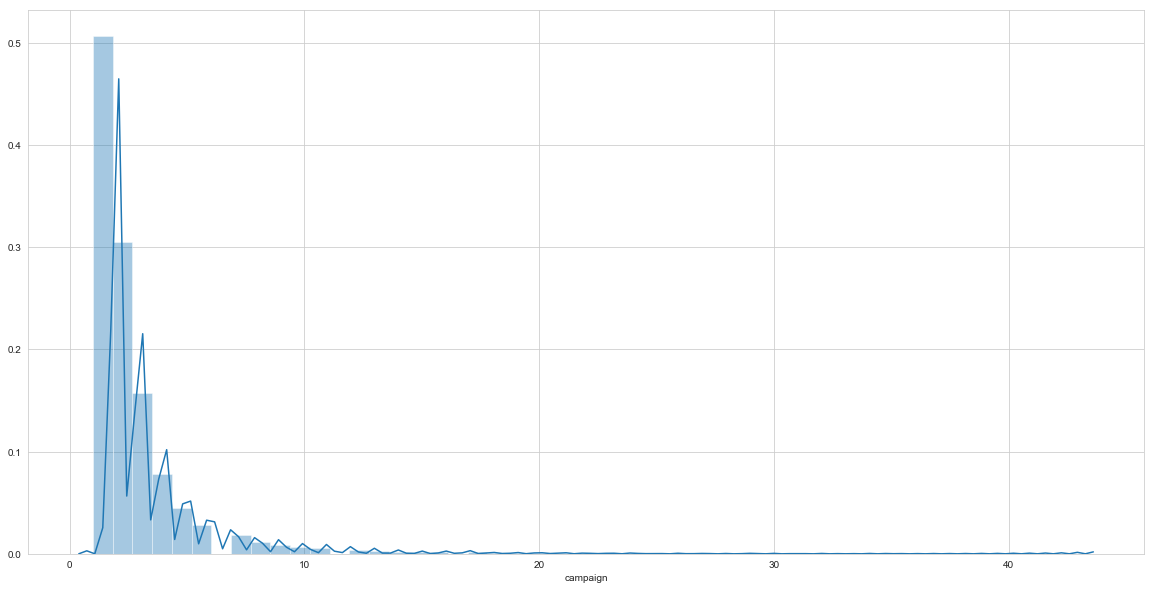

In [53]:
plt.figure(figsize =(20,10))
sns.distplot(data['campaign'])

From the histogram and other observations through value count, Campaign seems to be a categorical data but hotcoded numerically

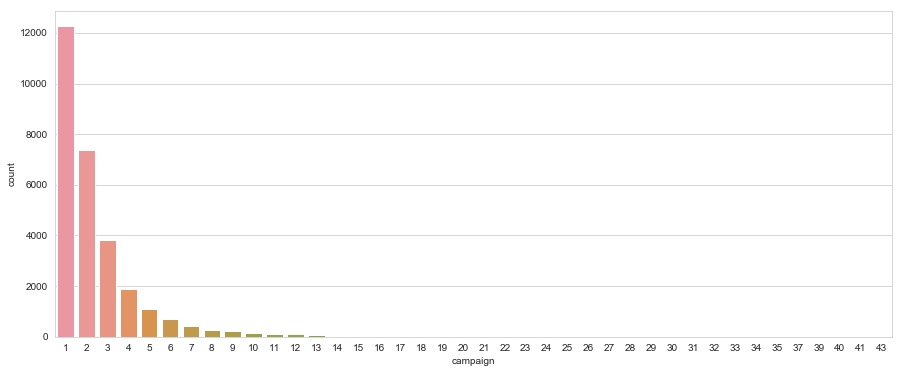

In [54]:
plt.figure(figsize =(15,6))
sns.countplot(data['campaign'])

In [55]:
data['pdays'].describe()

count    28831.000000
mean       963.215844
std        185.077567
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [56]:
data['pdays'].value_counts()

999    27792
3        308
6        295
4         76
12        40
9         38
10        37
2         36
7         35
5         30
13        23
1         19
15        19
11        19
14        15
8         14
0          9
17         7
16         7
18         5
22         2
21         1
20         1
19         1
25         1
27         1
Name: pdays, dtype: int64

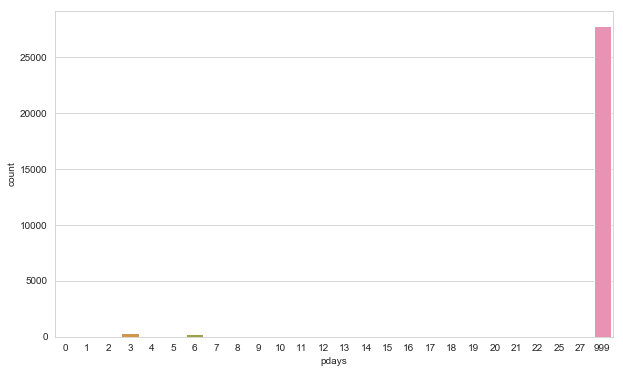

In [57]:
plt.figure(figsize =( 10,6))
sns.countplot(data['pdays'])

In [58]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [59]:
data['previous'].describe()

count    28831.000000
mean         0.172592
std          0.494338
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [60]:
data['previous'].value_counts()

0    24907
1     3174
2      531
3      157
4       46
5       12
6        3
7        1
Name: previous, dtype: int64

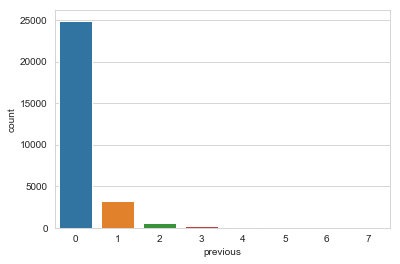

In [61]:
sns.countplot(data['previous'])

In [62]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [63]:
# continue from poutcome,
# recall ur dashbord
# Campaign, pdays previous are also categorical data

# 

In [64]:
data['poutcome'].describe()

count           28831
unique              3
top       nonexistent
freq            24907
Name: poutcome, dtype: object

In [65]:
data['poutcome'].value_counts()

nonexistent    24907
failure         2984
success          940
Name: poutcome, dtype: int64

In [66]:
data['poutcome'].value_counts(normalize = True) * 100

nonexistent    86.389650
failure        10.349971
success         3.260379
Name: poutcome, dtype: float64

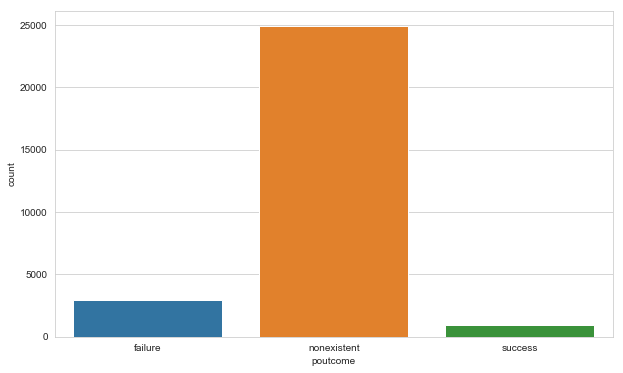

In [67]:
plt.figure(figsize =( 10,6))
sns.countplot(data['poutcome'])

In [68]:
data['emp_var_rate'].describe()

count    28831.000000
mean         0.113202
std          1.570978
min         -3.370000
25%         -1.770000
50%          1.130000
75%          1.430000
max          1.430000
Name: emp_var_rate, dtype: float64

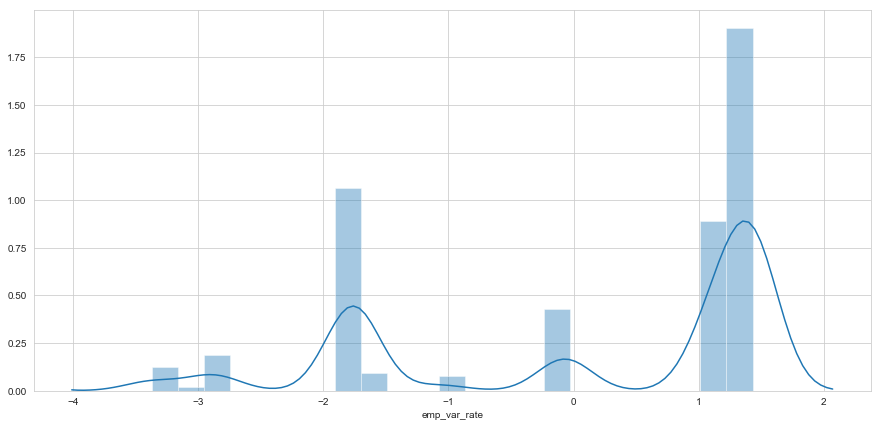

In [69]:
plt.figure(figsize =(15,7))
sns.distplot(data['emp_var_rate'])

In [70]:
data['cons_price_idx'].describe()

count    28831.000000
mean        46.788632
std          0.289847
min         46.100500
25%         46.537500
50%         46.874500
75%         46.997000
max         47.383500
Name: cons_price_idx, dtype: float64

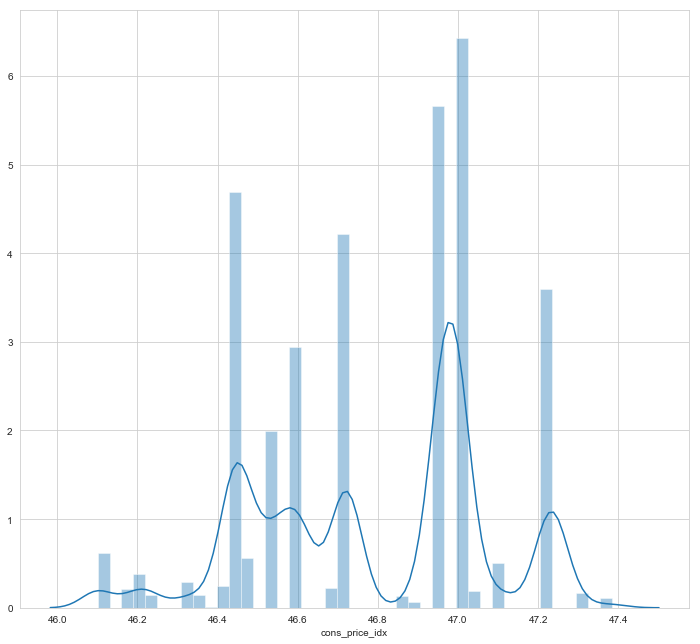

In [71]:
plt.figure(figsize = (12,11))
sns.distplot(data['cons_price_idx'])

In [72]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [73]:
data['cons_conf_idx'].describe()

count    28831.000000
mean       -28.360564
std          3.244405
min        -35.560000
25%        -29.890000
50%        -29.260000
75%        -25.480000
max        -18.830000
Name: cons_conf_idx, dtype: float64

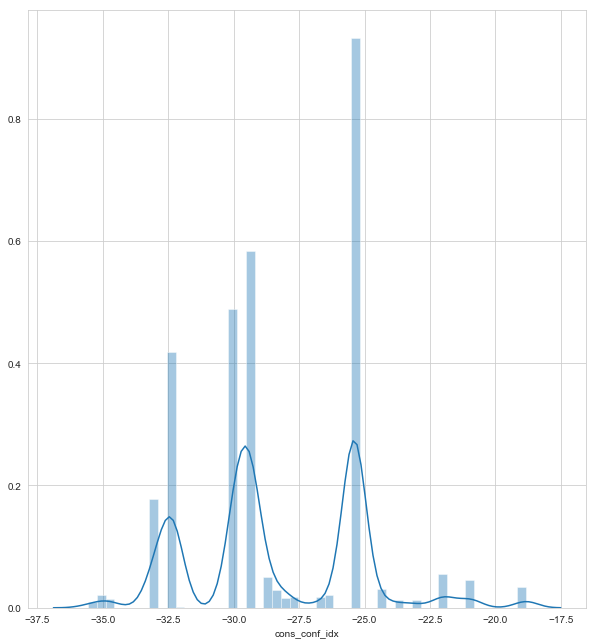

In [74]:
plt.figure(figsize = (10,11))
sns.distplot(data['cons_conf_idx'])

In [75]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [76]:
data['euribor3m'].describe()

count    28831.000000
mean         4.623599
std          1.735202
min          1.636000
25%          2.346000
50%          5.859000
75%          5.963000
max          6.047000
Name: euribor3m, dtype: float64

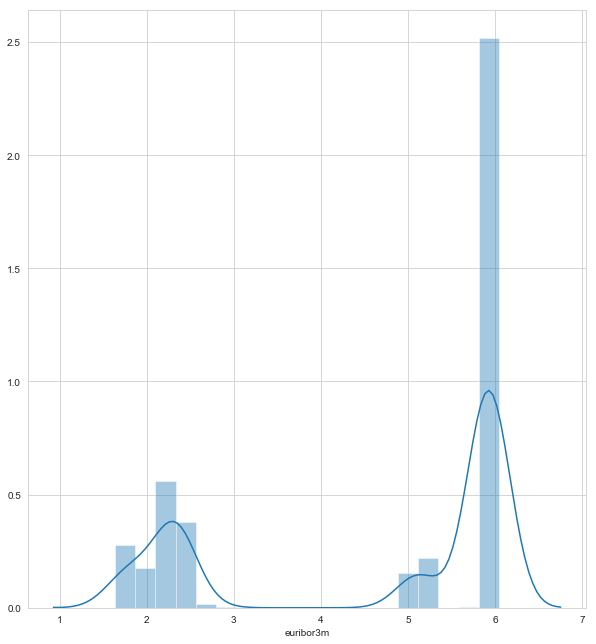

In [77]:
plt.figure(figsize = (10,11))
sns.distplot(data['euribor3m'])

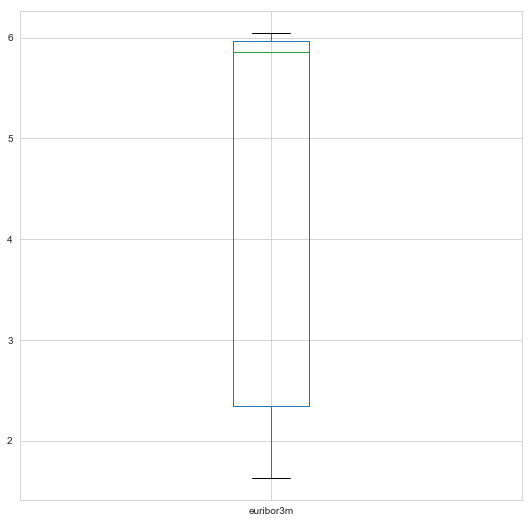

In [78]:
data['euribor3m'].plot(kind = 'box', figsize = (9,9))

In [79]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [80]:
data['nr_employed'].describe()

count    28831.000000
mean      5167.011880
std         72.542598
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr_employed, dtype: float64

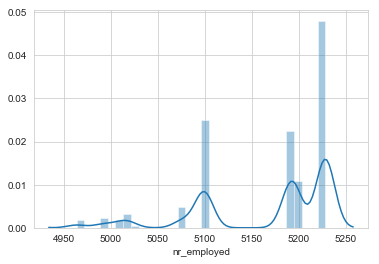

In [81]:
sns.distplot(data['nr_employed'])

In [82]:
data['subscribed'].value_counts()

0    25580
1     3251
Name: subscribed, dtype: int64

In [83]:
data['subscribed'].value_counts(normalize = True)*100

0    88.723943
1    11.276057
Name: subscribed, dtype: float64

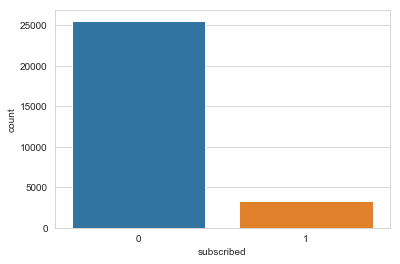

In [84]:
sns.countplot(data['subscribed'])

In [85]:
data.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [86]:
# Continous data = age, duration,emp var rate,cons price index,cons conf idx, euriborm, nr employed


In [87]:
# create a dashbord with the cat and con

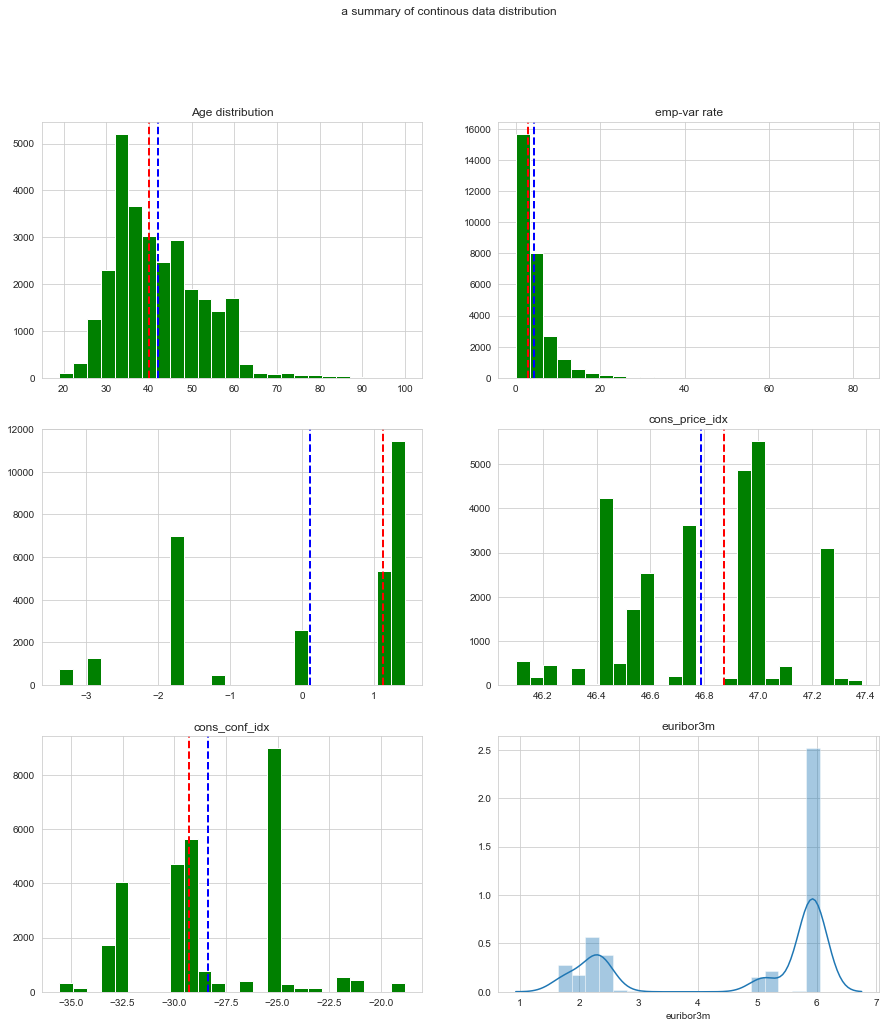

In [88]:
f, axes = plt.subplots(3,2, figsize = (15,16))
sns.set_style('darkgrid')
plt.suptitle(' a summary of continous data distribution')


axes[0][0].hist(age, color='green', bins =25)
axes[0][0].axvline(age.mean(), color ='blue', linestyle ='dashed',linewidth=2) 
axes[0][0].axvline(age.median(), color ='red', linestyle = 'dashed', linewidth = 2)
axes[0][0].title.set_text('Age distribution')



axes[0][1].hist(data['duration'],  color='green', bins =25)
axes[0][1].axvline(data['duration'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
axes[0][1].axvline(data['duration'].median(), color ='red', linestyle = 'dashed', linewidth = 2)
axes[0][1].title.set_text('duration distribution')

axes[1][0].hist(data['emp_var_rate'], color='green', bins =25)
axes[1][0].axvline(data['emp_var_rate'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
axes[1][0].axvline(data['emp_var_rate'].median(), color ='red', linestyle = 'dashed', linewidth = 2)
axes[0][1].title.set_text('emp-var rate')


axes[1][1].hist(data['cons_price_idx'], color='green', bins =25)
axes[1][1].axvline(data['cons_price_idx'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
axes[1][1].axvline(data['cons_price_idx'].median(), color ='red', linestyle = 'dashed', linewidth = 2)
axes[1][1].title.set_text('cons_price_idx')

axes[2][0].hist(data['cons_conf_idx'], color='green', bins =25)
axes[2][0].axvline(data['cons_conf_idx'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
axes[2][0].axvline(data['cons_conf_idx'].median(), color ='red', linestyle = 'dashed', linewidth = 2)
axes[2][0].title.set_text('cons_conf_idx')

axes[2][1] = sns.distplot(data['euribor3m'])
axes[2][1].title.set_text('euribor3m')

### Correlation Analysis(Multivariate Analysis)

In [89]:
data.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
age,1.000000,-0.003741,0.008758,-0.036666,0.027094,-0.000595,0.003682,0.126321,0.010074,-0.018042,0.022599
duration,-0.003741,1.000000,-0.072445,-0.052064,0.020699,-0.029512,0.006035,-0.008210,-0.035028,-0.047273,0.399154
campaign,0.008758,-0.072445,1.000000,0.050604,-0.077222,0.154406,0.128875,-0.013231,0.138310,0.147386,-0.070794
pdays,-0.036666,-0.052064,0.050604,1.000000,-0.581918,0.267267,0.069794,-0.089671,0.294894,0.373829,-0.326485
previous,0.027094,0.020699,-0.077222,-0.581918,1.000000,-0.418479,-0.199327,-0.054665,-0.452338,-0.498962,0.226691
emp_var_rate,-0.000595,-0.029512,0.154406,0.267267,-0.418479,1.000000,0.772732,0.191490,0.972088,0.906417,-0.300379
cons_price_idx,0.003682,0.006035,0.128875,0.069794,-0.199327,0.772732,1.000000,0.052215,0.684425,0.517057,-0.135474
cons_conf_idx,0.126321,-0.008210,-0.013231,-0.089671,-0.054665,0.191490,0.052215,1.000000,0.273833,0.098496,0.051999
euribor3m,0.010074,-0.035028,0.138310,0.294894,-0.452338,0.972088,0.684425,0.273833,1.000000,0.945113,-0.309149
nr_employed,-0.018042,-0.047273,0.147386,0.373829,-0.498962,0.906417,0.517057,0.098496,0.945113,1.000000,-0.355616


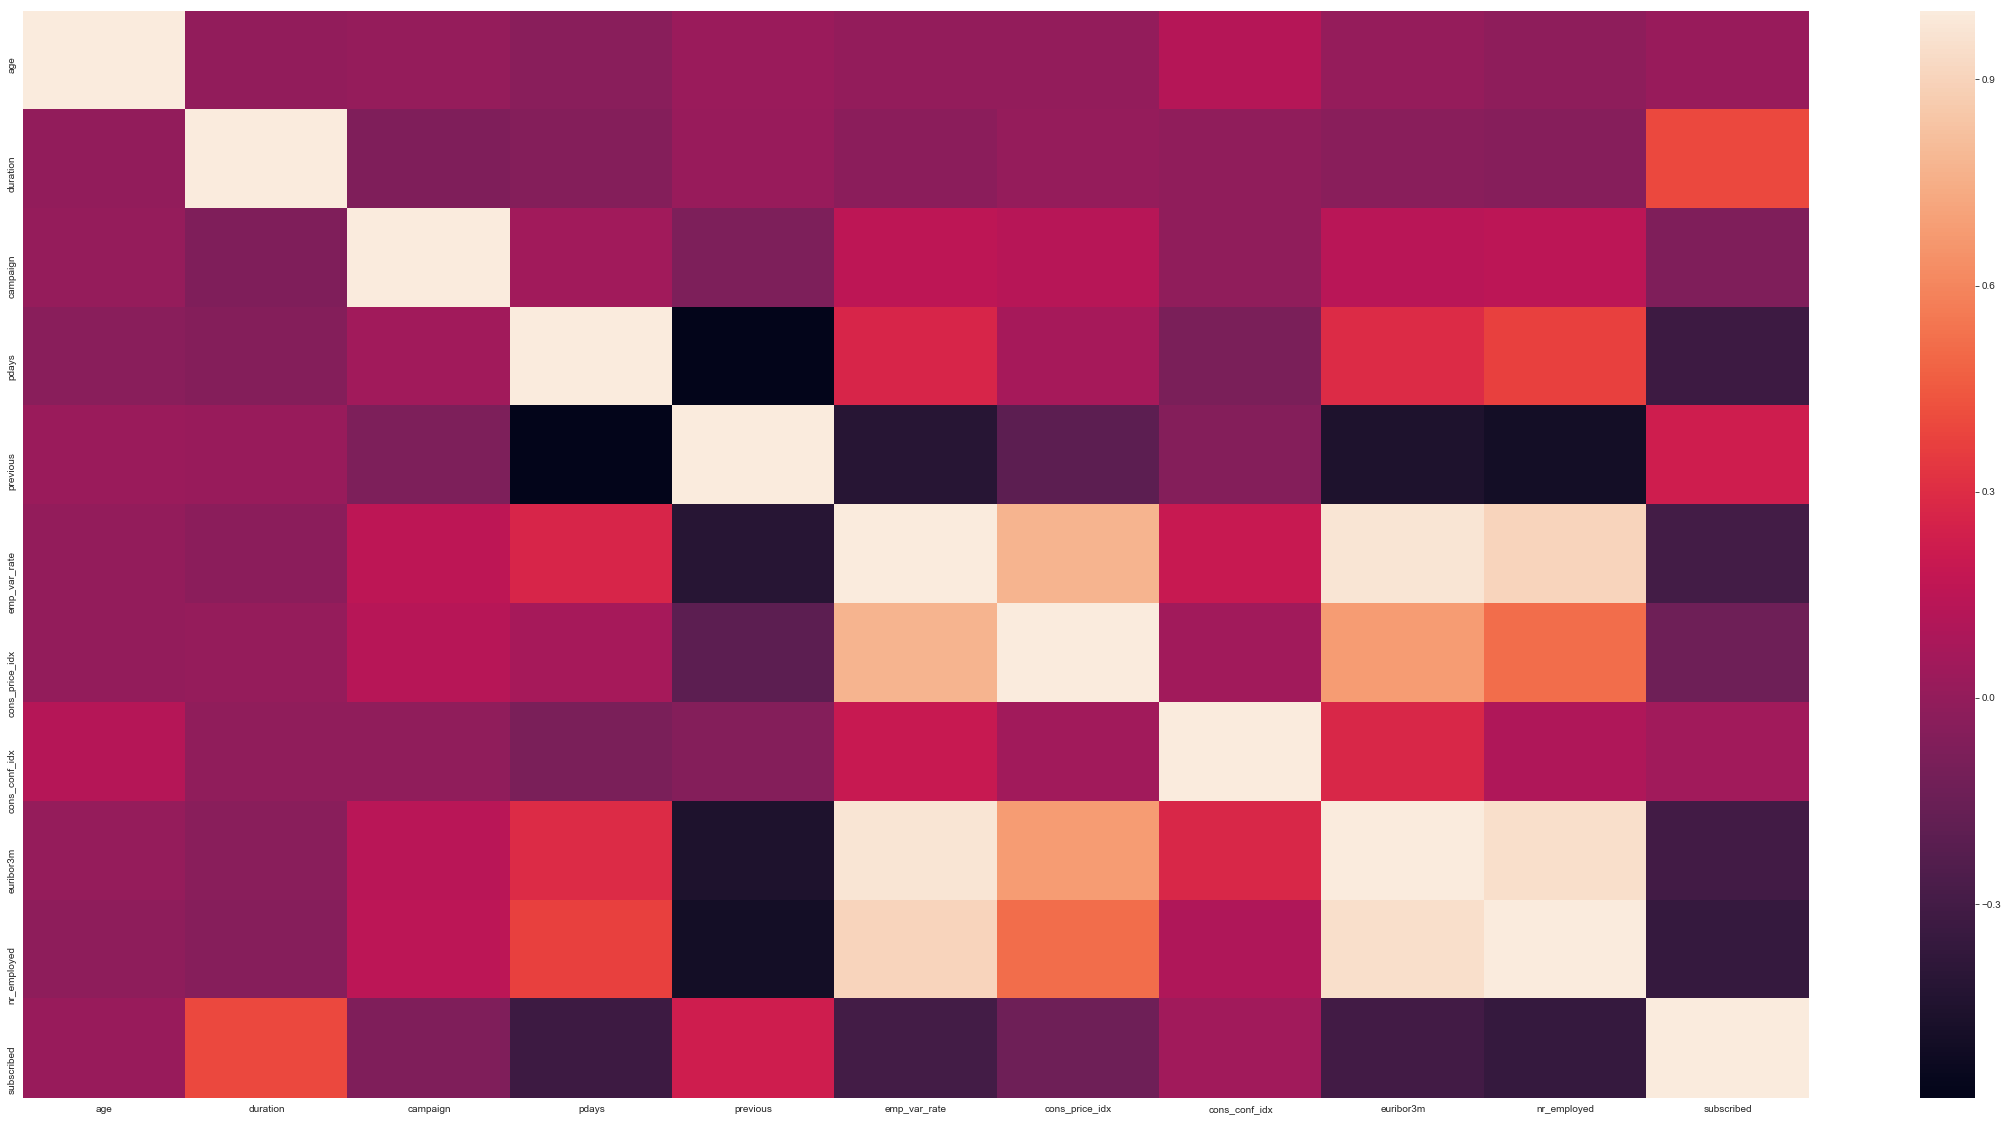

In [90]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr())

### prepocessing

In [91]:
new_subscribed = pd.Categorical(data['subscribed'])
new_subscribed = new_subscribed.rename_categories(['sub','will-not-sub'])
new_subscribed.dtype

CategoricalDtype(categories=['sub', 'will-not-sub'], ordered=False)

In [108]:
new_subscribed = pd.Series(new_subscribed)


### Loading the target data after Query from Postgres

In [162]:
tag = pd.read_csv('trainQT.csv')

In [93]:
data['subscribed'] = new_subscribed

In [94]:
data.head(5)

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,sub
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,sub
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,sub
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,sub
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,sub


In [95]:
data.drop('customer_id', inplace = True, axis =1)

In [114]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [115]:
y = tag['case']
x = data.drop(['subscribed'], axis = 'columns')

In [116]:
pd.get_dummies(x)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,-2.97,46.3565,-23.10,1.711,5023.5,...,0,0,0,1,0,0,0,1,0,0
1,31,0.200000,4,999,0,-1.77,46.4465,-32.34,2.252,5099.1,...,0,0,1,0,0,0,0,0,1,0
2,47,4.616667,2,999,0,1.13,46.9970,-25.48,5.862,5191.0,...,0,0,0,0,1,0,0,0,1,0
3,36,1.166667,1,999,1,-1.77,46.4465,-32.34,2.329,5099.1,...,0,0,0,0,1,0,0,1,0,0
4,34,19.683333,9,999,0,-1.77,46.4465,-32.34,2.252,5099.1,...,0,0,1,0,0,0,0,0,1,0
5,48,1.300000,2,999,1,-0.07,46.6000,-29.40,5.193,5195.8,...,0,0,0,1,0,0,0,1,0,0
6,34,2.366667,2,999,0,1.43,46.9590,-29.89,5.964,5228.1,...,0,0,0,0,0,1,0,0,1,0
7,34,8.733333,1,999,0,-2.87,46.4815,-28.56,2.217,5076.2,...,0,0,0,1,0,0,0,0,1,0
8,39,7.200000,1,999,0,-1.77,46.4215,-35.00,2.642,5099.1,...,0,0,1,0,0,0,0,0,1,0
9,40,0.983333,3,999,0,1.43,47.2325,-29.26,5.969,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [117]:
x = pd.get_dummies(x)

In [119]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state = 0)

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [121]:
x_train

array([[-0.5823733 ,  1.92351102,  1.5659657 , ..., -0.34172376,
         0.39676726, -0.18019179],
       [-0.10164943, -0.51354579,  0.14547797, ..., -0.34172376,
         0.39676726, -0.18019179],
       [-0.67851807,  0.23121877, -0.5647659 , ..., -0.34172376,
         0.39676726, -0.18019179],
       ...,
       [ 0.37907443,  1.48679044, -0.20964397, ..., -0.34172376,
         0.39676726, -0.18019179],
       [-0.29393898, -0.47455288,  0.14547797, ..., -0.34172376,
         0.39676726, -0.18019179],
       [-0.39008375,  0.41448544,  1.92108764, ..., -0.34172376,
         0.39676726, -0.18019179]])

## Implementing the machine learning Algorithm Random forest classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 2, random_state = 0)
rfc.fit(x_train, y_train)

C:\Users\Emack\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [147]:
y_train

5823     Will-not-sub
897      Will-not-sub
2739     Will-not-sub
6162     Will-not-sub
2503     Will-not-sub
747      Will-not-sub
2008     Will-not-sub
28818    Will-not-sub
8761     Will-not-sub
12720    Will-not-sub
5899     Will-not-sub
12442    Will-not-sub
5370     Will-not-sub
27219    Will-not-sub
7638     Will-not-sub
4636     Will-not-sub
6537     Will-not-sub
19728    Will-not-sub
22680    Will-not-sub
26821    Will-not-sub
27236    Will-not-sub
21813    Will-not-sub
12649      subscribed
5408     Will-not-sub
4204     Will-not-sub
5129     Will-not-sub
22422    Will-not-sub
27894    Will-not-sub
4191     Will-not-sub
13590    Will-not-sub
             ...     
2163       subscribed
6036     Will-not-sub
6921     Will-not-sub
6216     Will-not-sub
27469    Will-not-sub
16921    Will-not-sub
26277    Will-not-sub
2897     Will-not-sub
24152    Will-not-sub
18606    Will-not-sub
10327    Will-not-sub
18983    Will-not-sub
17089    Will-not-sub
14650    Will-not-sub
19852    W

In [148]:
y_pred =  rfc.predict(x_test)
y_pred

array(['Will-not-sub', 'Will-not-sub', 'Will-not-sub', ..., 'subscribed',
       'Will-not-sub', 'Will-not-sub'], dtype=object)

In [149]:
from sklearn.metrics import confusion_matrix
rfcm = confusion_matrix(y_test,y_pred)
rfcm

array([[6197,  159],
       [ 525,  327]], dtype=int64)

In [127]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Will-not-sub       0.92      0.97      0.95      6356
  subscribed       0.67      0.38      0.49       852

   micro avg       0.91      0.91      0.91      7208
   macro avg       0.80      0.68      0.72      7208
weighted avg       0.89      0.91      0.89      7208



In [128]:
def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

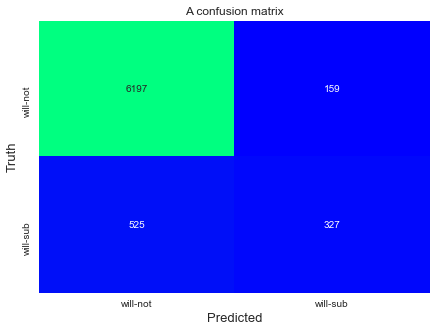

In [129]:
ConfusionMatrix(y_test, y_pred, label= ["will-not", "will-sub"])

In [130]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9051054384017758


## loading test data

In [131]:
test =pd.read_csv('test.csv')

In [132]:
test

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1
5,customer_id_17201,60,retired,married,professional.course,no,yes,yes,cellular,jul,...,10.083333,1,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1
6,customer_id_879,50,services,married,high.school,unknown,yes,no,telephone,may,...,4.050000,1,999,0,nonexistent,1.13,46.9970,-25.48,5.858,5191.0
7,customer_id_23757,53,admin.,divorced,university.degree,unknown,yes,no,cellular,aug,...,0.400000,7,999,0,nonexistent,1.43,46.7220,-25.27,5.964,5228.1
8,customer_id_10821,26,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,...,2.100000,4,999,0,nonexistent,1.43,47.2325,-29.26,5.964,5228.1
9,customer_id_14355,38,technician,divorced,professional.course,no,yes,yes,cellular,jul,...,0.716667,4,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1


In [133]:
test.drop('customer_id', inplace = True, axis =1)

In [134]:
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,59,technician,married,high.school,no,no,yes,cellular,may,mon,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,57,unknown,married,unknown,unknown,yes,no,telephone,may,thu,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,35,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,38,admin.,married,high.school,no,no,no,telephone,jun,fri,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,29,housemaid,married,high.school,no,yes,no,cellular,jul,fri,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1
5,60,retired,married,professional.course,no,yes,yes,cellular,jul,fri,10.083333,1,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1
6,50,services,married,high.school,unknown,yes,no,telephone,may,wed,4.050000,1,999,0,nonexistent,1.13,46.9970,-25.48,5.858,5191.0
7,53,admin.,divorced,university.degree,unknown,yes,no,cellular,aug,thu,0.400000,7,999,0,nonexistent,1.43,46.7220,-25.27,5.964,5228.1
8,26,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,2.100000,4,999,0,nonexistent,1.43,47.2325,-29.26,5.964,5228.1
9,38,technician,divorced,professional.course,no,yes,yes,cellular,jul,mon,0.716667,4,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1


In [135]:
pd.get_dummies(test)

test = pd.get_dummies(test)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,59,6.183333,1,999,1,-1.77,46.4465,-32.34,2.301,5099.1,...,0,0,0,1,0,0,0,1,0,0
1,57,4.750000,2,999,0,1.13,46.9970,-25.48,5.862,5191.0,...,0,0,0,0,1,0,0,0,1,0
2,35,0.866667,1,999,1,-1.77,46.4465,-32.34,2.315,5099.1,...,0,0,1,0,0,0,0,1,0,0
3,38,5.916667,4,999,0,1.43,47.2325,-29.26,5.969,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,29,3.150000,2,999,0,1.43,46.9590,-29.89,5.965,5228.1,...,0,0,1,0,0,0,0,0,1,0
5,60,10.083333,1,999,0,1.43,46.9590,-29.89,5.964,5228.1,...,0,0,1,0,0,0,0,0,1,0
6,50,4.050000,1,999,0,1.13,46.9970,-25.48,5.858,5191.0,...,0,0,0,0,0,0,1,0,1,0
7,53,0.400000,7,999,0,1.43,46.7220,-25.27,5.964,5228.1,...,0,0,0,0,1,0,0,0,1,0
8,26,2.100000,4,999,0,1.43,47.2325,-29.26,5.964,5228.1,...,0,0,0,0,0,0,1,0,1,0
9,38,0.716667,4,999,0,1.43,46.9590,-29.89,5.964,5228.1,...,0,0,0,1,0,0,0,0,1,0


In [137]:
test = sc.fit_transform(test)

C:\Users\Emack\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Emack\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [138]:
test

array([[ 1.63673572,  0.43471455, -0.55091472, ...,  2.95723995,
        -2.50290836, -0.19056054],
       [ 1.44356431,  0.10019511, -0.19514502, ..., -0.33815315,
         0.3995352 , -0.19056054],
       [-0.68132121, -0.8061192 , -0.55091472, ...,  2.95723995,
        -2.50290836, -0.19056054],
       ...,
       [-1.35742114, -0.03205677, -0.19514502, ..., -0.33815315,
         0.3995352 , -0.19056054],
       [ 1.05722148, -0.81389873,  0.16062468, ..., -0.33815315,
         0.3995352 , -0.19056054],
       [ 0.47770725, -0.1487496 , -0.19514502, ...,  2.95723995,
        -2.50290836, -0.19056054]])

In [150]:
test_pred =  rfc.predict(test)

In [151]:
test_pred

array(['Will-not-sub', 'Will-not-sub', 'Will-not-sub', ...,
       'Will-not-sub', 'Will-not-sub', 'Will-not-sub'], dtype=object)

In [155]:
test_predict = pd.Series(test_pred)

In [156]:
test_predict

0        Will-not-sub
1        Will-not-sub
2        Will-not-sub
3        Will-not-sub
4        Will-not-sub
5        Will-not-sub
6        Will-not-sub
7        Will-not-sub
8        Will-not-sub
9        Will-not-sub
10       Will-not-sub
11       Will-not-sub
12       Will-not-sub
13       Will-not-sub
14       Will-not-sub
15       Will-not-sub
16       Will-not-sub
17       Will-not-sub
18       Will-not-sub
19       Will-not-sub
20         subscribed
21       Will-not-sub
22       Will-not-sub
23       Will-not-sub
24       Will-not-sub
25       Will-not-sub
26       Will-not-sub
27       Will-not-sub
28       Will-not-sub
29       Will-not-sub
             ...     
12327    Will-not-sub
12328    Will-not-sub
12329    Will-not-sub
12330    Will-not-sub
12331    Will-not-sub
12332    Will-not-sub
12333    Will-not-sub
12334    Will-not-sub
12335    Will-not-sub
12336    Will-not-sub
12337    Will-not-sub
12338    Will-not-sub
12339    Will-not-sub
12340    Will-not-sub
12341    W

In [160]:
test_predict.to_csv('test_predict.csv')